In [1]:
import json
import os
import csv
import re

import math
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf       # for ANOVA
import statsmodels.stats.multicomp as multi # for post hoc test 
import statsmodels.api as sm
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.preprocessing import normalize
import scipy.spatial.distance as distance
import scipy.stats as stats
from scipy.stats import boxcox
from scipy.stats import skew
from pyquaternion import Quaternion
from matplotlib.backends.backend_pdf import PdfPages

from scipy import stats, integrate
import matplotlib.pyplot as plt
import matplotlib

%matplotlib inline
%load_ext rpy2.ipython

import seaborn as sns
import math
import sys
import subprocess

# Import analysis Scripts
import nbimporter
import Analysis_Util as analysis_util


pd.set_option('display.max_columns', None)  
sns.set()


Importing Jupyter notebook from Analysis_Util.ipynb


In [ ]:
# WIndows Only
%load_ext RWinOut


In [3]:
%%R

library(MASS)  # for boxcox
library(reshape2)
library(dplyr)
library(tidyr)
library(ez)
library(knitr)
library(ggplot2)
library(ARTool)
library(gmodels) # for ci
library(car)
library(lsmeans)

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
from notebook.services.config import ConfigManager
cm = ConfigManager()

cm.update('livereveal', {
              'width': 1920,
              'height': 1080,
              'scroll': True,
})


cm.update("livereveal", {
    "theme": "serif",
    "transition": "zoom"
  })

{'height': 1080,
 'scroll': True,
 'theme': 'serif',
 'transition': 'zoom',
 'width': 1920}

In [44]:
IMG_TAG = """<img src="data:image/gif;base64,{0}" alt="some_text">"""

def animate_gif(name):
    data = open(name, "rb").read()
    data = base64.standard_b64encode(data)
    data = str(data,'utf-8')
    return IMG_TAG.format(data)

def display_animation(anim):
    return HTML(anim)




In [32]:

graph_gif = display_animation(animate_gif("img/oculus_dash_touch2.gif"))

# animate_gif("img/oculus_dash_touch2.gif")

In [ ]:
# Youtube
# HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/S_f2qV2_U00?rel=0&amp;controls=0&amp;showinfo=0" frameborder="0" allowfullscreen></iframe>')

# Vimeo
# HTML('<iframe src="https://player.vimeo.com/video/26763844?title=0&byline=0&portrait=0" width="700" height="394" frameborder="0" webkitallowfullscreen mozallowfullscreen allowfullscreen></iframe><p><a href="https://vimeo.com/26763844">BAXTER DURY - CLAIRE (Dir Cut)</a> from <a href="https://vimeo.com/dannysangra">Danny Sangra</a> on <a href="https://vimeo.com">Vimeo</a>.</p>')


In [6]:
# Slides

from IPython.display import HTML


# An Evaluation of Unimanual Menu Selection in Virtual Reality

 
 
 


## Jeremy Hartmann & Matthew Lakier

# Outline

- Motivation
- Related Work
- System & Approach
- Results
- Future Work



In [1]:
#
#
#
# MOTIVATION
#
#
#




# Motivation



## Virtual reality is in an idenity crisis

### Skeuomorphism is rampant in the design of a VR experience

Talk about the state of VR
- We are in the days of BOB

### Microsoft Bob


<center>
<img src="img/bob_win95.jpg" alt="" style="width:80%">
<center>


In [ ]:
B.O.B Windows

- Next Oculus Home


### Oculus Home

<center>
<img src="img/oculus_home.png" alt="" style="width:100%">
<center>

Two primary modes of interaction in VR
- Pointing methods like raycasting. 
- Tangible methods like touch

### Tangible interaction in Oculus Dash



<center>
<img src="img/oculus_dash_touch2.gif" alt="" style="width:100%">
<center>

Oculus dash
- New oculus interface. 
- Uses touch and ray cast exclusively

## We want to challenge the status-quo by investigating unimanual selection techniques that are inherently spatial

In [1]:
#
#
#
# Related Work
#
#
#

# Related Work

### Bowman et al. 1997


<center>   
<table style="width:100%">
  <tr>
    <th>    
        <img src="img/bowman_ray.png" alt="C3 Old" style="width:100%">
    </th>
    <th>
        <img src="img/bowman_gogo.png" alt="C3 Exp" style="width:100%">
    </th> 
  </tr>
</table>
</center>

An Evaluation of Techniques for Grabbing and Manipulating Remote Objects in Immersive Virtual Environments

- Did an evaluation across different pointing task in a virtual environment
    - Raycast
    - Go-Go Technique
   


### Grosjean et al. 2002

<center>   
<table style="width:100%">
  <tr>
    <th>    
        <img src="img/C3_old.png" alt="C3 Old" style="width:100%">
    </th>
    <th>
        <img src="img/C3_old_exp.png" alt="C3 Exp" style="width:100%">
    </th> 
  </tr>
</table>
</center>


C3 Menu Selection

- Looking at 26 cubes located around a central point
- Selections tasks
- Used a table top like CAVE environment. 


# Techniques

## Evaluate raycast and Command and Control Cube (C3) with a scale invariant version of the cube selection technique

Scale Invariance is important for minimal movment, reducing energy consumption of the user. 

<center>
<table style="width:100%">
  <tr>
    <th>
        <img src="img/bowman_ray.png" alt="Italian Trulli">
    </th>
    <th>    
        <img src="img/C3_old.png" alt="C3 Old" style="width:100%">
    </th>
    <th>
        <img src="img/C3_new.png" alt="C3 Exp" style="width:100%">
    </th> 
  </tr>
</table>
</center>


## Experiment Design

* Three Techniques
    - Raycast
    - C3
    - Scale Invariant Cube Selection



<center>   
<table style="width:100%;text-align:center">
  <tr>
    <th> 
       <h2> <center>Raycast</center></h2>
        <img src="img/LM_O_Anim.gif" alt="C3 Old" style="width:100%">
    </th>
    <th>
        <h2><center>Command and Control Cube (C3) </center></h2>
        <img src="img/C3_O_Anim.gif" alt="C3 Exp" style="width:100%">
    </th>
    <th>
        <h2><center>Scale Invariant Cube Selection</center></h2>
        <img src="img/C3S_O_Anim.gif" alt="C3 Exp" style="width:100%">
    </th> 
  </tr>
</table>
</center>



## Two Orderings
- Ordered (selection task)
- Unordered (search task)
    

## Ordered

<center>   
<table style="width:100%">
  <tr>
    <th>    
        <img src="img/LM_O_Anim.gif" alt="C3 Old" style="width:100%">
    </th>
    <th>
        <img src="img/C3_O_Anim.gif" alt="C3 Exp" style="width:100%">
    </th>
<!--     <th>
        <img src="img/C3S_O_Anim.gif" alt="C3 Exp" style="width:100%">
    </th>  -->
  </tr>
</table>
</center>



## Unordered

<center>   
<table style="width:100%">
  <tr>
    <th>    
        <img src="img/LM_U_Anim.gif" alt="C3 Old" style="width:100%">
    </th>
    <th>
        <img src="img/C3_U_Anim.gif" alt="C3 Exp" style="width:100%">
    </th> 
<!--     <th>
        <img src="img/C3S_U_Anim.gif" alt="C3 Exp" style="width:100%">
    </th>  -->
  </tr>
</table>
</center>



## Summary

#### 3 Techniques   X    2 Orderings     X      4 Blocks      X   26 Trials
#### = 624 datapoints


In [1]:
#
#
#
# Analysis
#
#
#

# Analysis

In [6]:
distalLocationAll = r"D:\Dropbox\WATERLOO FILES - ALL\CS889 - Methods in HCI\Project\AnalysisScripts\CSV\PAll_Distills\PAll_distill_13.txt"


In [6]:
# OSX
distalLocationAll = r"/Volumes/Second_HD/Dropbox/WATERLOO FILES - ALL/CS889 - Methods in HCI/Project/AnalysisScripts/CSV/PAll_Distills/PAll_distill_13.txt"

In [7]:
# Clean Data

alldata = pd.read_csv(distalLocationAll)
alldata['Condition'].count()

alldata = alldata[alldata.Section != 'practice']
alldata = alldata[alldata['Error'] != False]

# Remove outliers
alldata = analysis_util.remove_outliers(alldata, "TotalTime", ["Condition"], verbose=True)

44 (0.015873015873015872%) outliers removed.
before
                                 mean          std   amax  len
Condition                                                     
CS889C3                   1147.433190   491.863710   5181  464
CS889C3Gesture            1060.636957   629.376045   7978  460
CS889C3Unordered          5110.012821  4325.880646  28776  468
CS889C3UnorderedGesture   5033.019737  4447.920152  37734  456
CS889LinearMenu           1449.435345   390.315739   3227  464
CS889LinearMenuUnOrdered  3743.463043  2976.395852  44061  460
after
                                 mean          std   amax  len
Condition                                                     
CS889C3                   1096.594714   342.821469   2538  454
CS889C3Gesture            1008.991170   435.273889   2904  453
CS889C3Unordered          4763.213043  3444.944337  17957  460
CS889C3UnorderedGesture   4662.636161  3400.750251  18174  448
CS889LinearMenu           1432.949891   358.242007   2619  4

In [1]:
#######################################################################################################################
#######################################################################################################################
#
# LEARNING EFFECT
#
#######################################################################################################################
#######################################################################################################################


## Learning Effects and Blocks

In [8]:
def process_time_across_Block(size):
    sns.set_style("whitegrid")
    sns.set_context("notebook", font_scale=3 ,rc={"lines.linewidth": 3.5})
    plt.figure(figsize=(size, size/2))
    data = alldata#[alldata.Target == 0]
    ax = sns.factorplot(x="Block", y="TotalTime", hue="Condition", #row="Target", col="TargetDistancefromSphereOrigin",
                       data=data, dodge=True, estimator=np.median, size = size, aspect=1.6, capsize=0.1)

<Figure size 1296x648 with 0 Axes>

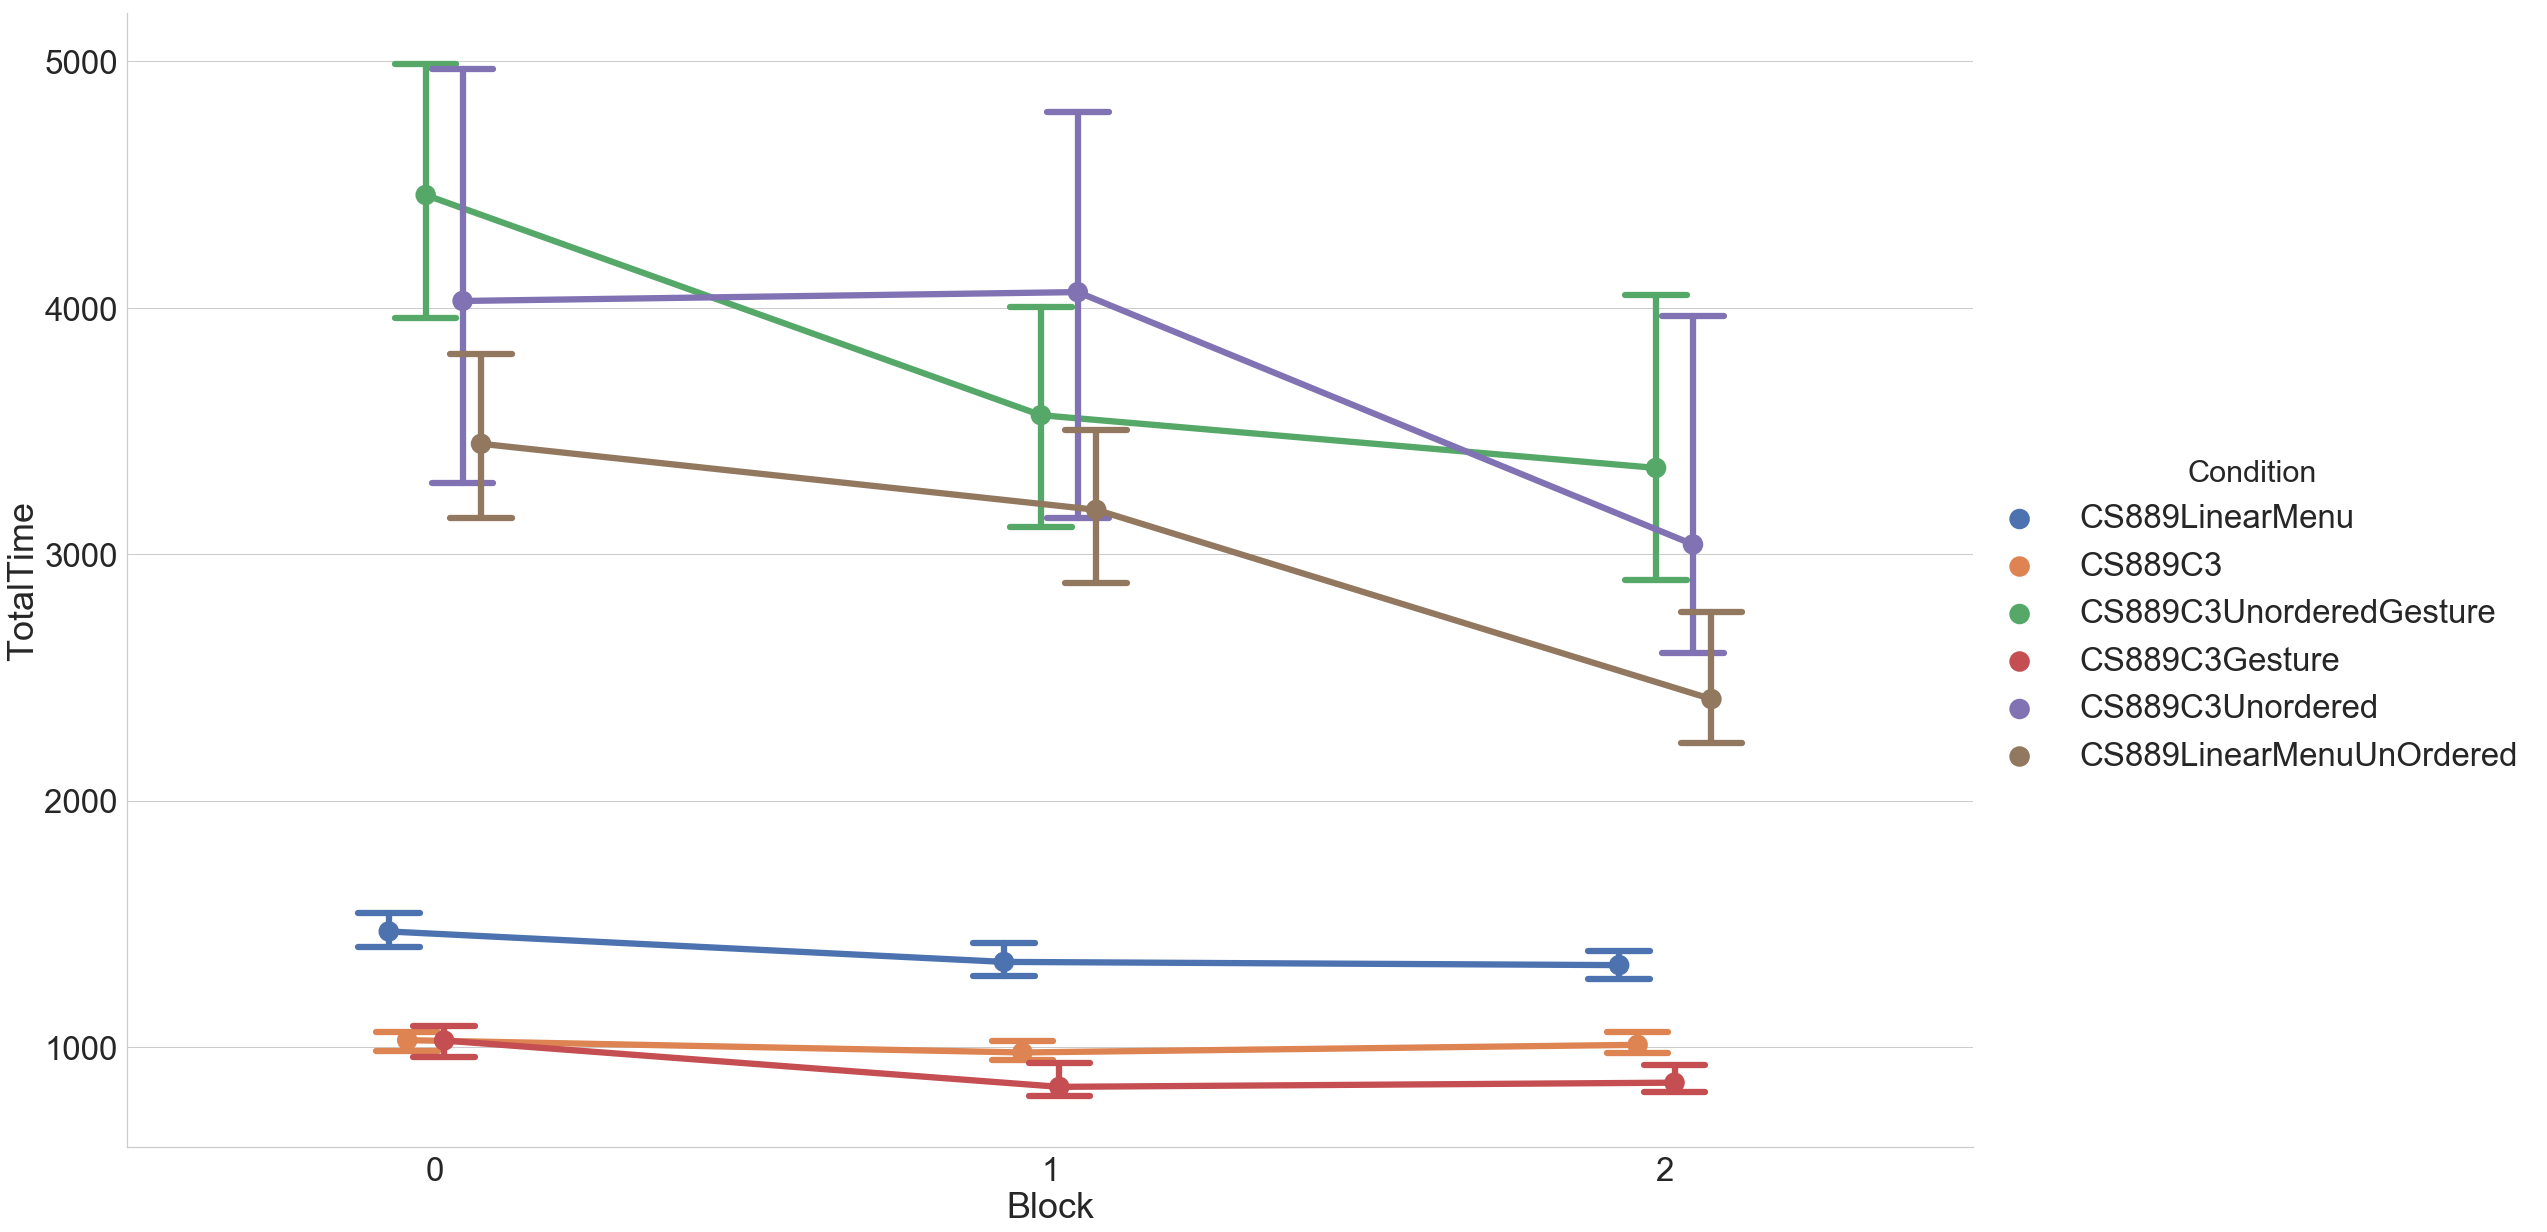

In [10]:
# Time X Blocks
process_time_across_Block(18)


   Box.x     Box.y
57  -0.4 -9979.986


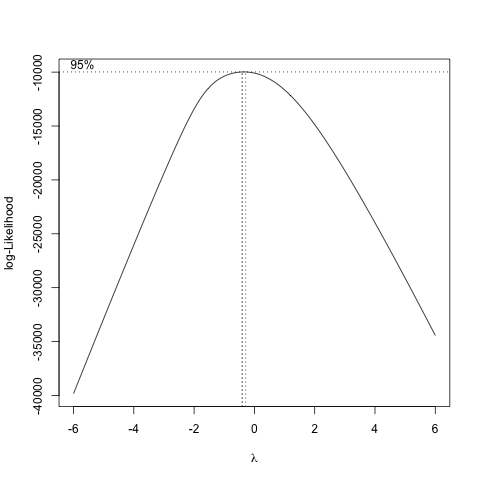

In [8]:
%%R -i alldata
Box = boxcox(alldata$TotalTime ~ 1,              # Transform Turbidity as a single vector
             lambda = seq(-6,6,0.1)      # Try values -6 to 6 by 0.1
             )

Cox = data.frame(Box$x, Box$y)            # Create a data frame with the results

Cox2 = Cox[with(Cox, order(-Cox$Box.y)),] # Order the new data frame by decreasing y

Cox2[1,]                                  # Display the lambda with the greatest
                                          #    log likelihood


In [9]:
%%R -i alldata

lambda = Cox2[1, "Box.x"]                 # Extract that lambda

r_data = alldata
r_data$TotalTimeNormal = (alldata$TotalTime ^ lambda - 1)/lambda   # Transform the original data


In [11]:
%%R
run_learning <- function(data) {
        m <- ezANOVA(
            data=data,
            wid=.(ParticipantID),
            within=.(Block),
            dv=.(TotalTimeNormal)
        )
        print(m$ANOVA)

        pw <- pairwise.t.test(data$TotalTimeNormal, data$Block, p.adj = "holm")
        print(pw)
    }

In [12]:
%%R 
run_learning(r_data)


  Effect DFn DFd       F          p p<.05       ges
1  Block   1   5 32.9548 0.00224776     * 0.8682643

	Pairwise comparisons using t tests with pooled SD 

data:  data$TotalTimeNormal and data$Block 

  0       1    
1 0.032   -    
2 7.2e-05 0.069

P value adjustment method: holm 


In [ ]:
#######################################################################################################################
#######################################################################################################################
# 
# TIME BY CONDITION
# 
#######################################################################################################################
#######################################################################################################################
 

In [13]:
# Create new Level type field
alldata["LevelType"] = alldata.Condition.map(lambda x: "Ordered" if (x == "CS889LinearMenu" or x == "CS889C3" or x == "CS889C3Gesture") else "Unordered")



In [14]:
def plot_Time_By_Condition(size):
    plt.figure(figsize=(10, 12))
    sns.set_style("whitegrid")
    sns.set_context("notebook", font_scale=2.5, rc={"lines.linewidth": 2.5})
#     plt.figure(figsize=(size, size/3))
    data = alldata[alldata.Block != 0]
    data = data.sort_values(['LevelType']).reset_index(drop=True)
    ax = sns.factorplot(x="Condition", y="TotalTime", #col="LevelType", #row="Target", col="TargetDistancefromSphereOrigin",
                       data=data, dodge=True, estimator=np.median, capsize=.1, size=size, aspect=2, kind="bar", ci=95,
                       palette=sns.cubehelix_palette(6, start=0.5, rot=-.75))

## Time by Condition

<Figure size 720x864 with 0 Axes>

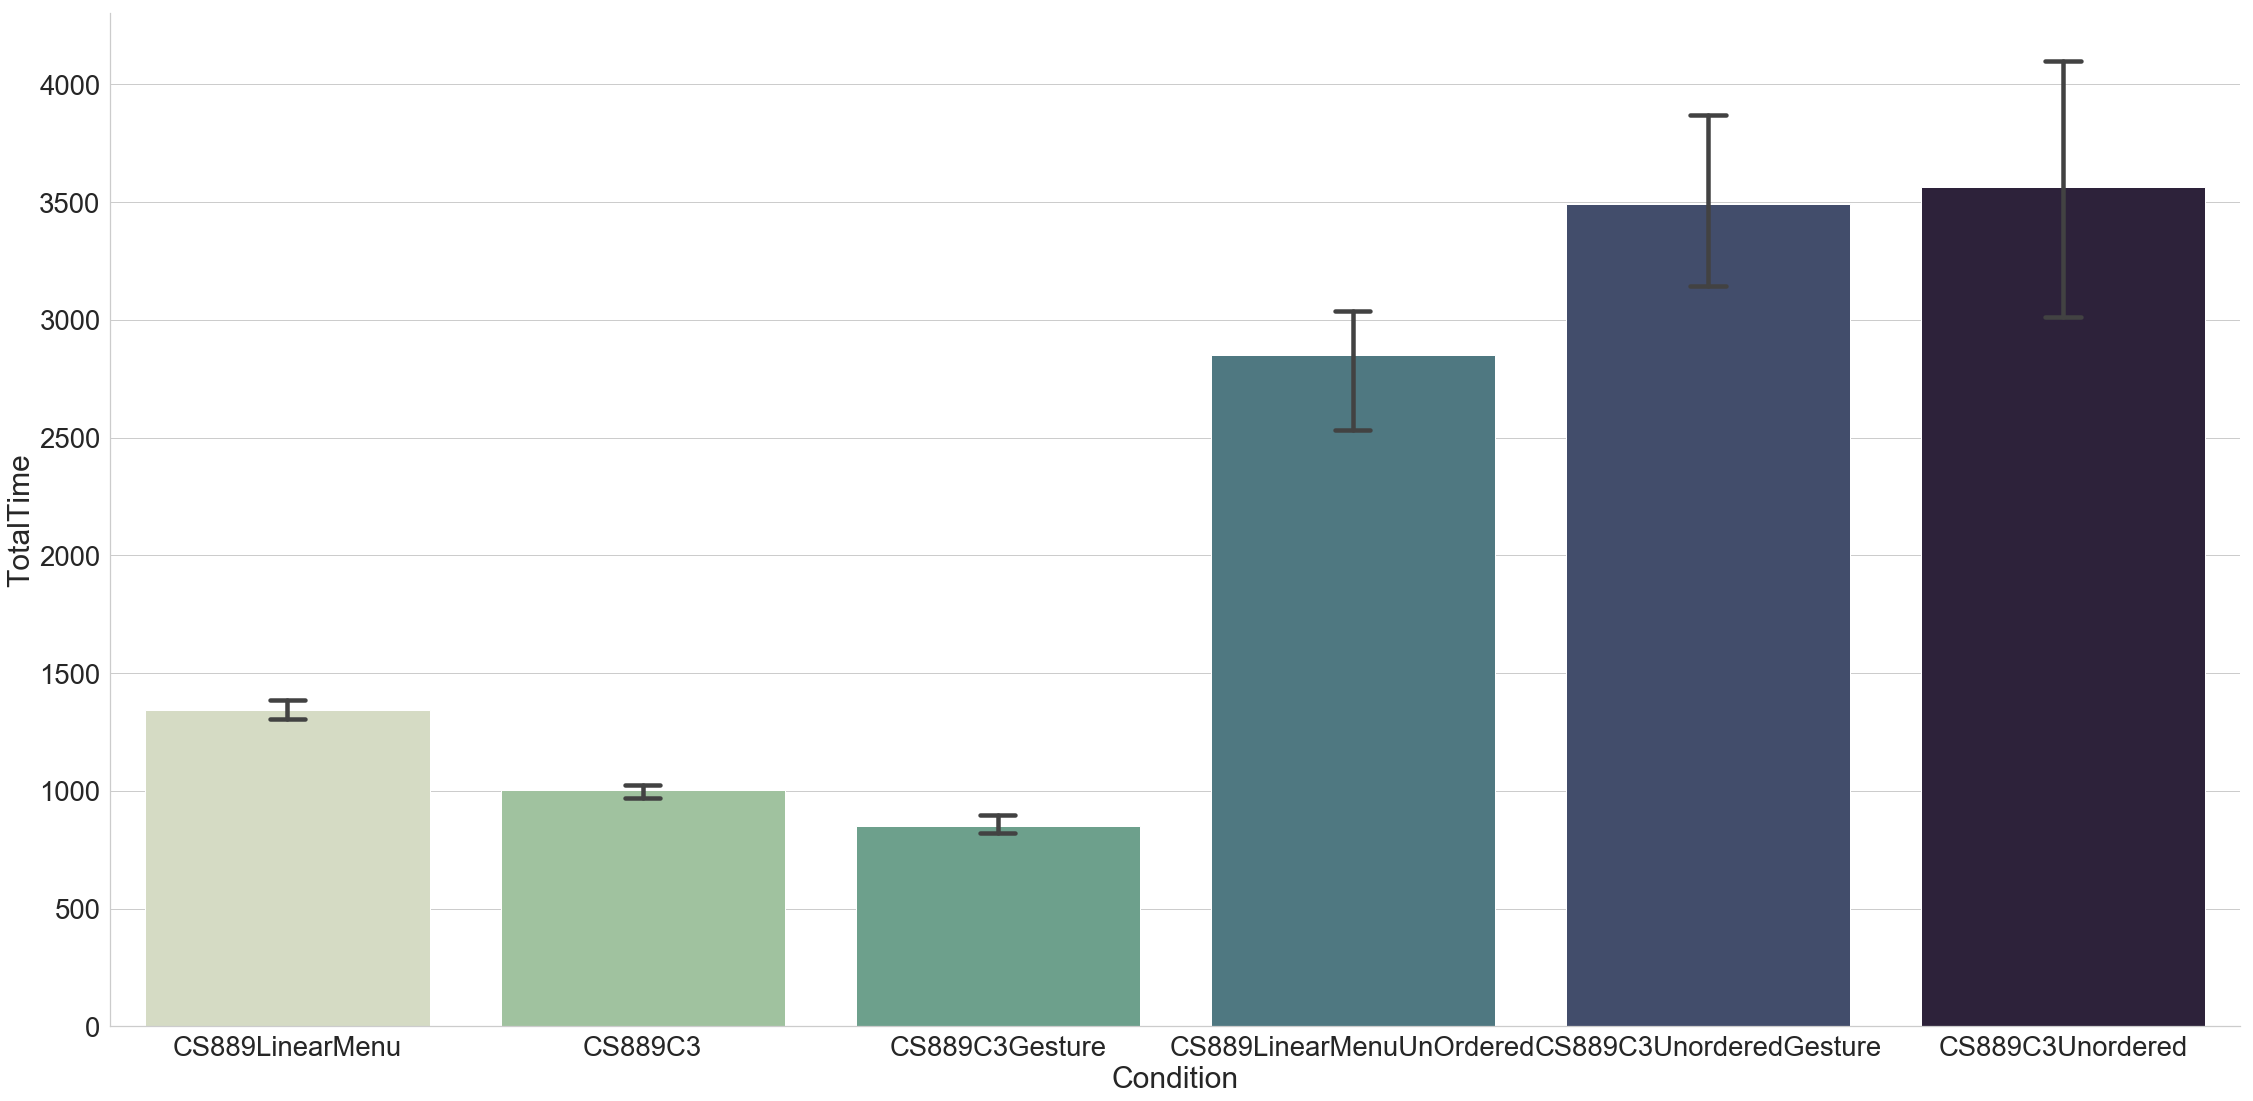

In [11]:
# Time by Condition
plot_Time_By_Condition(16)


In [15]:
%%R
run_time_by_Condition <- function(data) {
        m <- ezANOVA(
            data=data,
            wid=.(ParticipantID),
            within=.(Condition),
            dv=.(TotalTimeNormal)
        )
        print(m$ANOVA)

        pw <- pairwise.t.test(data$TotalTimeNormal, data$Condition, p.adj = "holm")
        print(pw)
    }

In [16]:
%%R

r_data <- r_data %>%
        filter(Block == 2)
run_time_by_Condition(r_data)


     Effect DFn DFd        F            p p<.05      ges
2 Condition   5  25 47.31661 5.989864e-12     * 0.871011

	Pairwise comparisons using t tests with pooled SD 

data:  data$TotalTimeNormal and data$Condition 

                         CS889C3 CS889C3Gesture CS889C3Unordered
CS889C3Gesture           3.3e-07 -              -               
CS889C3Unordered         < 2e-16 < 2e-16        -               
CS889C3UnorderedGesture  < 2e-16 < 2e-16        0.414           
CS889LinearMenu          2.8e-07 < 2e-16        < 2e-16         
CS889LinearMenuUnOrdered < 2e-16 < 2e-16        0.104           
                         CS889C3UnorderedGesture CS889LinearMenu
CS889C3Gesture           -                       -              
CS889C3Unordered         -                       -              
CS889C3UnorderedGesture  -                       -              
CS889LinearMenu          < 2e-16                 -              
CS889LinearMenuUnOrdered 0.018                   < 2e-16        

P 

In [ ]:
#######################################################################################################################
#######################################################################################################################
# 
# Error Rate
# 
#######################################################################################################################
#######################################################################################################################


## Error Rate

In [16]:
%%R

# Collect all data
in_data <- read.csv("log.csv")
in_data$block <- factor(in_data$block)
# Tag whether linear, scale invariant, or gestural
in_data <- in_data %>%
    mutate(linear=if_else(
            condition == "CS889LinearMenu" |
            condition == "CS889LinearMenuUnOrdered",
            T, F),
           scaleInv=if_else(
            condition == "CS889C3Gesture" |
            condition == "CS889C3UnorderedGesture",
            T, F),
           ordered=if_else(
            condition == "CS889LinearMenu" |
            condition == "CS889C3" |
            condition == "CS889C3Gesture",
            T, F)) %>%
    mutate(time = end_time - start_time)
timesd <- sd(in_data$time)
timeu <- mean(in_data$time)
origlen <- length(in_data$time)
in_data <- in_data %>%
    filter(((time-timeu) < 3*timesd) & ((time-timeu) > -3*timesd))

err_data <- in_data %>%
    filter(section != "practice") %>%
    filter(block != 0 & block != 1) %>%
    group_by(pid, condition) %>%
    mutate(is_err=if_else(err_count > 0, 1, 0)) %>%
    summarize(errRate=1 / (3 + mean(ordered=is_err)*100),
              ordered=first(ordered))

plot_error_data <- function() {
    err_plot_data <- err_data %>% group_by(condition) %>%
    summarize(meanerrRate=mean(errRate),
              ordered=first(ordered),
              cil=max(0, ci(errRate, confidence=0.95)["CI lower"]),
              ciu=ci(errRate, confidence=0.95)["CI upper"])
    stopifnot(levels(err_plot_data$condition) == c(
        "CS889C3", "CS889C3Gesture", "CS889C3Unordered",
        "CS889C3UnorderedGesture", "CS889LinearMenu", "CS889LinearMenuUnOrdered"))
    # Rename factors for plot
    levels(err_plot_data$condition) = c(
        "C3 O", "C3 SI O", "C3",
        "C3 SI", "LIN O", "LIN")
    # Order factors
    err_plot_data$condition <- factor(
        err_plot_data$condition,
        levels = c("C3 O", "C3 SI O", "LIN O", "C3", "C3 SI", "LIN"))
    ggplot(err_plot_data, aes(x=condition, y=meanerrRate, fill=ordered)) +
        geom_bar(stat="identity")  +
        scale_fill_viridis_d(begin=0.3, end=0.5, breaks=c(1,0)) +
        labs(x="Condition", y="Error Rate (%)", fill="Ordered") + 
        theme_light() +
        scale_x_discrete(limits=rev(levels(err_plot_data$condition))) +
        coord_flip() +
        geom_errorbar(aes(ymin=cil, ymax=ciu), width=0.1)

}


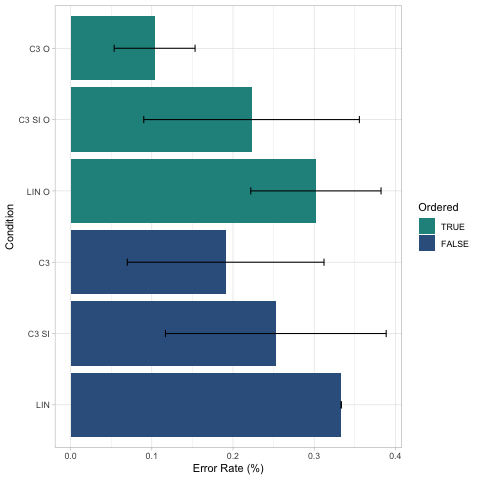

In [17]:
%%R
plot_error_data()



<center>
<img src="img/error_rate.png" alt="" style="width:50%">
</center>


In [ ]:
#######################################################################################################################
#######################################################################################################################
# 
# Participant Preference Data
# 
#######################################################################################################################
#######################################################################################################################


# Preference Data

In [130]:
participantLocation = r"D:\Dropbox\WATERLOO FILES - ALL\CS889 - Methods in HCI\Project\AnalysisScripts\CSV\postQuestionnaire.csv"


In [12]:
# OSX
participantLocation = r"/Volumes/Second_HD/Dropbox/WATERLOO FILES - ALL/CS889 - Methods in HCI/Project/AnalysisScripts/CSV/postQuestionnaire.csv"


In [13]:
preferenceData = pd.read_csv(participantLocation)

preferenceData["Technique_2"] = preferenceData.Technique.map(lambda x: "LM" if (x == "Linear Menu") else "C3")
preferenceData["scaleInvariant_2"] = preferenceData.scaleInvariant.map(lambda x: "S" if (x == "Scale Invariant") else "NS")
preferenceData["Ordered_2"] = preferenceData["Ordered "].map(lambda x: "O" if (x == "Ordered") else "U")

preferenceData["CombinedTechnique2"] = preferenceData.Technique_2 + preferenceData.scaleInvariant_2 + preferenceData["Ordered_2"]
preferenceData["CombinedTechnique"] = preferenceData.Technique + preferenceData.scaleInvariant + preferenceData["Ordered "]



In [14]:

def process_overall_enjoyment(size):
    data = preferenceData
    data = data.sort_values(['Ordered_2']).reset_index(drop=True)
    data.loc[data.enjoyedOverall == 'Strongly Agree', 'result'] = 5 
    data.loc[data.enjoyedOverall == 'Agree', 'result'] = 4 
    data.loc[data.enjoyedOverall == 'Neither Agree nor DIsagree', 'result'] = 3 
    data.loc[data.enjoyedOverall == 'Disagree', 'result'] = 2 
    data.loc[data.enjoyedOverall == 'Strongly Disagree', 'result'] = 1 
    sns.set_style("whitegrid")
    sns.set_context("notebook", font_scale=2.5, rc={"lines.linewidth": 2.5})
    plt.figure(figsize=(size, size/2))
    ax = sns.boxplot(x="CombinedTechnique2", y="result",# col="TargetType", #col="isOccluded",
                       data=data, dodge=True, #estimator=np.mean, capsize=.1, #errwidth=1.5,
                    palette=sns.cubehelix_palette(6, start=0.5, rot=-.75))

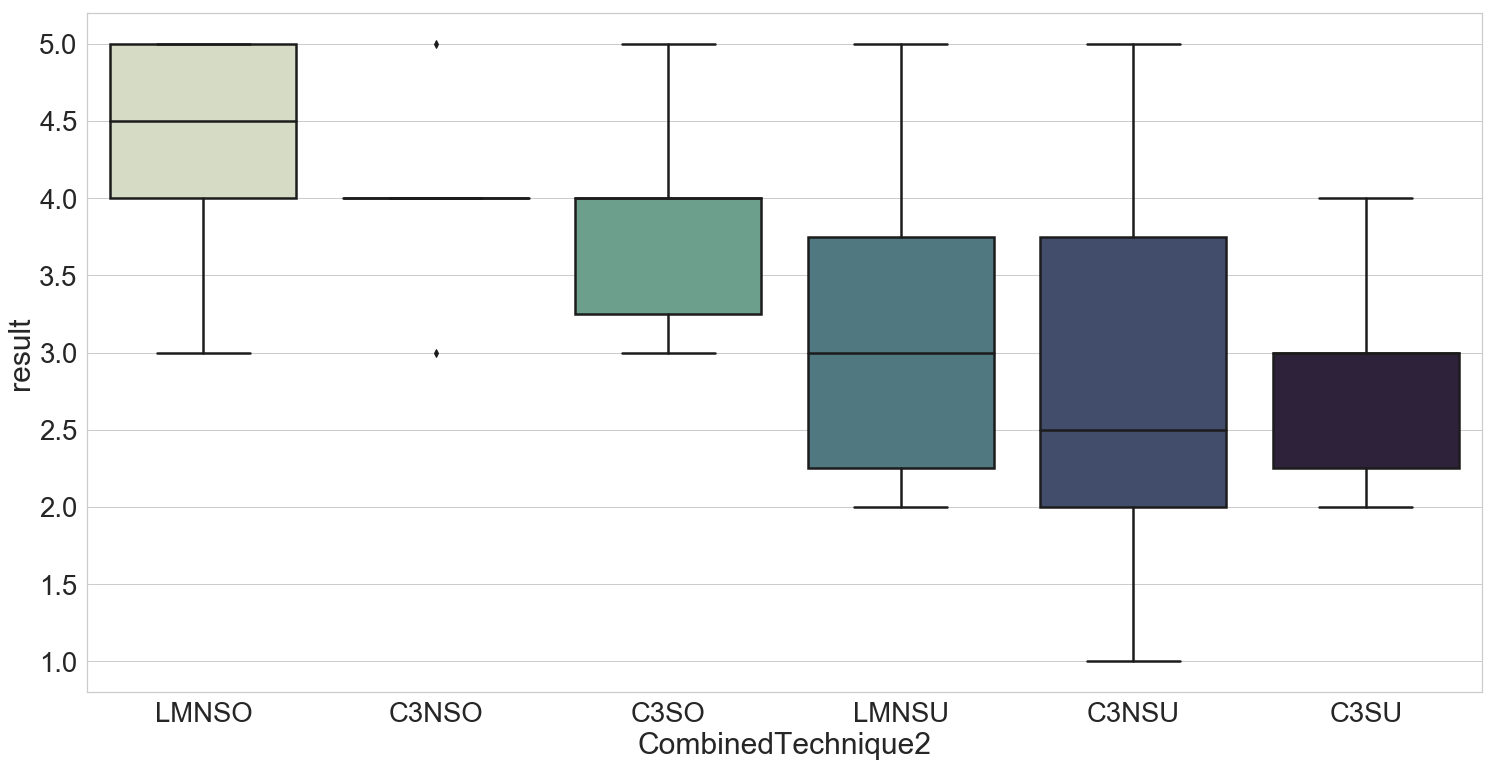

In [15]:
# Overall Enjoyment
process_overall_enjoyment(25)


# Future Work

## Vary the number of menu items displayed simultaneously

In [15]:
def process_swarm_block(size, kind):
    sns.set_style("whitegrid")
    sns.set_context("notebook", font_scale=3 ,rc={"lines.linewidth": 3.5})
    plt.figure(figsize=(size, size/2))
    data = alldata[alldata.LevelType == "Unordered"]
    ax = sns.factorplot(x="Block", y="TotalTime", hue="Condition", #row="Target", col="TargetDistancefromSphereOrigin",
                       kind=kind, data=data, dodge=True, estimator=np.median, size = size, aspect=1.6)

<Figure size 1440x720 with 0 Axes>

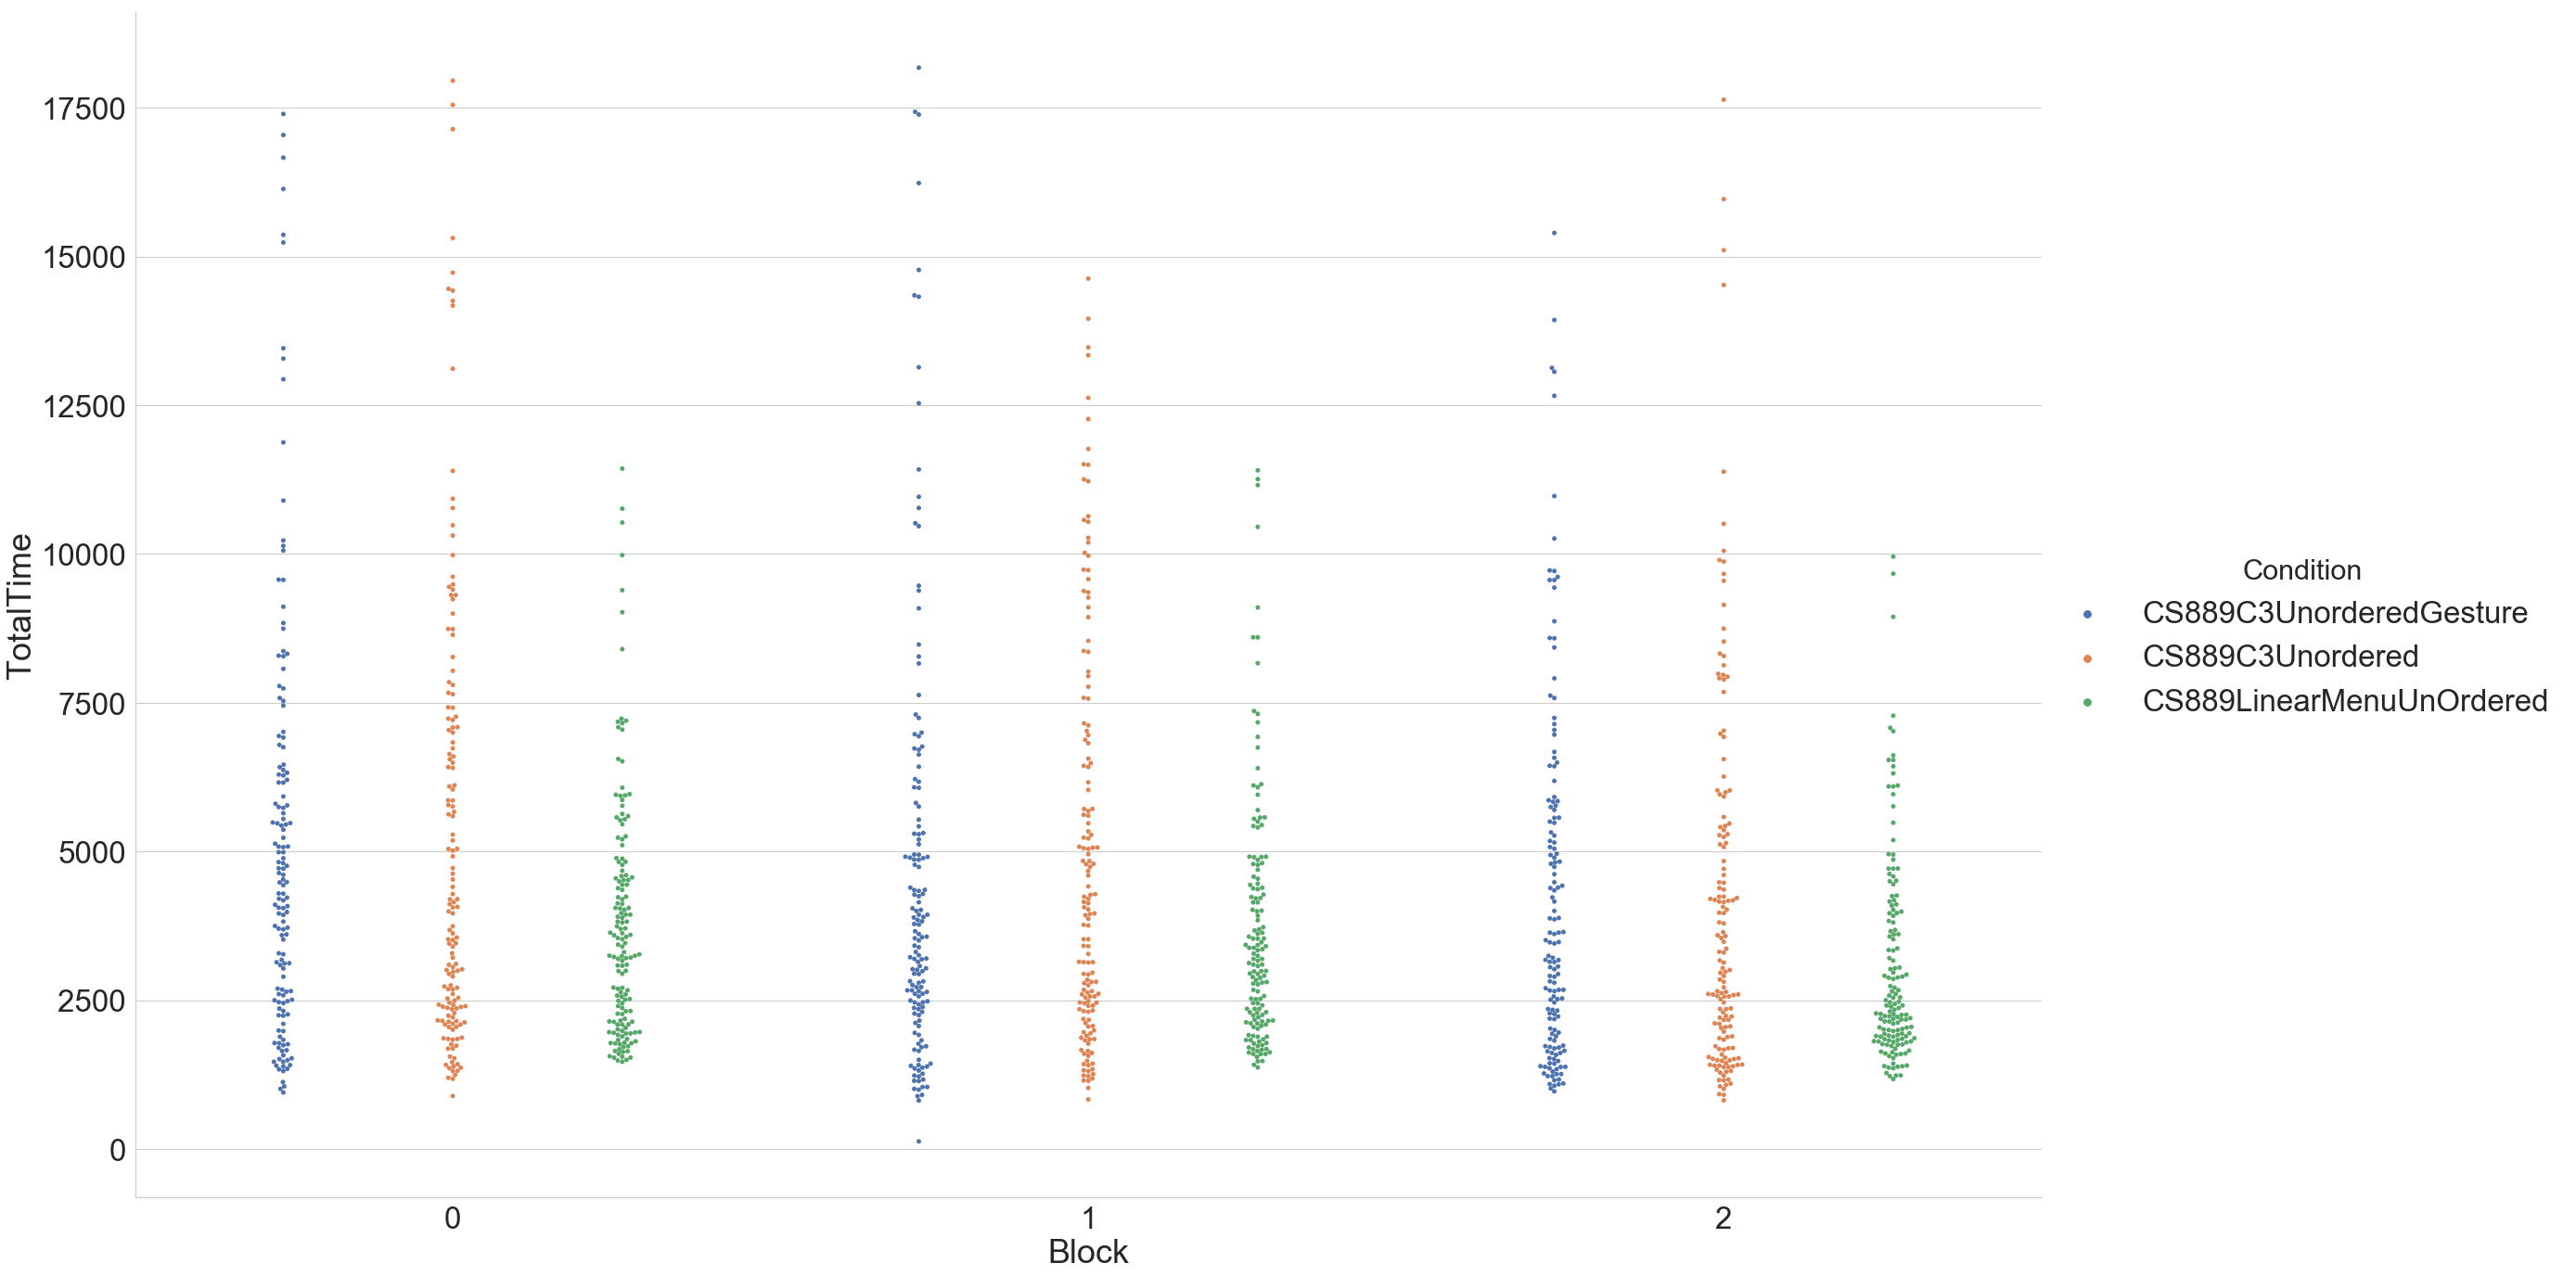

In [18]:
process_swarm_block(20, "swarm")

## Investigate hierarchies and their effect on selection and learning



<center>
<img src="img/hierarchical_menu.png" alt="" style="width:60%">
<center>


# Questions

In [1]:
#
#
#
# Image Refsa
#
#
#

# Image Ref


- https://www.nu.nl/internet/3527145/virtuele-microsoft-assistent-bob-komt-terug.html
- https://uploadvr.com/oculus-home-rift-gear-now-look-identical/
- https://www.youtube.com/watch?v=SvP_RI_S-bw
- https://www.autodeskresearch.com/publications/mmlimits







# Refs

Bowman, D. A., & Hodges, L. F. (1997). An evaluation of techniques for grabbing and manipulating remote objects in immersive virtual environments. In Proceedings of the 1997 symposium on Interactive 3D graphics - SI3D ’97 (p. 35-). https://doi.org/10.1145/253284.253301

Grosjean, J., Burkhardt, J.-M., Coquillart, S., & Richard, P. (2002). Evaluation of the Command and Control Cube. In Proceedings. Fourth IEEE International Conference on Multimodal Interfaces (pp. 473–478). IEEE Comput. Soc. https://doi.org/10.1109/ICMI.2002.1167041